In [15]:
from sklearn.datasets import fetch_olivetti_faces

# Cargamos los datos
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

print(X.data.shape)

(400, 4096)


## Cuantas clases tiene el dataset?

In [16]:
import numpy as np

classes = np.unique(y)
len(classes)

40

Min max scaler

In [17]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

transforme el dataset con PCA para retener 90% de var

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

In [20]:
def plot_var_curve(X):
    plt.plot(X, lw=4)
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')

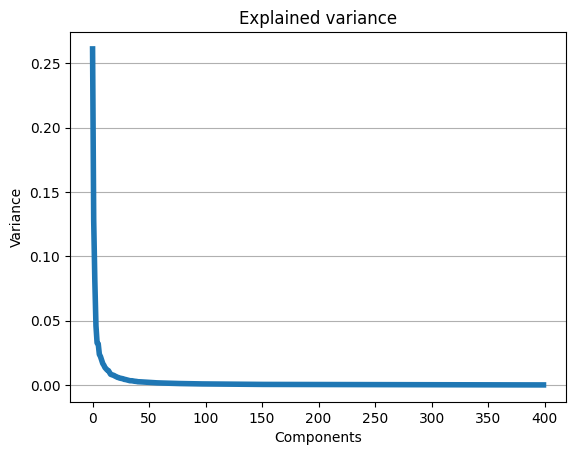

In [21]:
import matplotlib.pyplot as plt

plot_var_curve(pca.explained_variance_ratio_)

In [22]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v and i < len(exp_var):
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoentes para retener el 90% de la varianza del dataset original
min_var(0.9,pca.explained_variance_ratio_)

65

Para mantener el 90% de la varianza calculamos PCA con 56 componenetes

In [23]:
pca = PCA(n_components=65)
X_= pca.fit_transform(X)
print(X_.shape)

(400, 65)


LOF k=5 + histograma de los puntajes, def humbral de corte

In [24]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(X_)
scores = lof.negative_outlier_factor_

In [25]:
import numpy as np

def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))


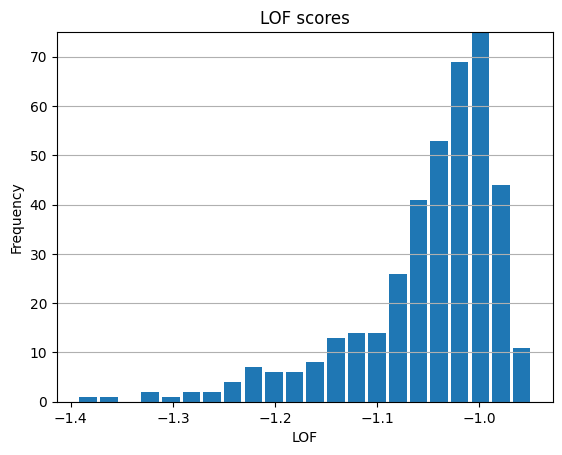

In [26]:
plot_hist(scores, 'LOF scores')

In [27]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

In [28]:
lof_threshold(-1.34,scores)

0.005

Separar inlaiers y outliers con el umbral

In [29]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.005)
labels = lof.fit_predict(X_)

In [34]:
# labels
# remove outliers
X_clean = X_[labels != -1]
y_clean = y[labels != -1]

Clasificador de vecinos cercanos con k=5, train/test = 0.8/0.2 y evaluar

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5)
clf = nbrs.fit(X_train, y_train)

In [39]:
clf.score(X_test, y_test)

0.825

In [38]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       1.00      0.33      0.50         3
           3       1.00      0.25      0.40         4
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           6       0.75      0.75      0.75         4
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       0.33      1.00      0.50         1
          15       0.67      1.00      0.80         2
          16       0.00      0.00      0.00         1
          17       0.67    

/home/gabi/Documents/U 2023-2/IIC2433/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gabi/Documents/U 2023-2/IIC2433/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gabi/Documents/U 2023-2/IIC2433/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [41]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 35, 36, 38,
       39])

In [42]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

No estan todas las clases en el y_test

In [43]:
y_removed = y[labels == -1]

In [44]:
y_removed

array([ 7, 19])

In [48]:
np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))

In [46]:
np.unique(y_clean, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))